In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
data=pd.read_csv("C:/Users/oguru/Downloads/Onlineshopping")

In [5]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


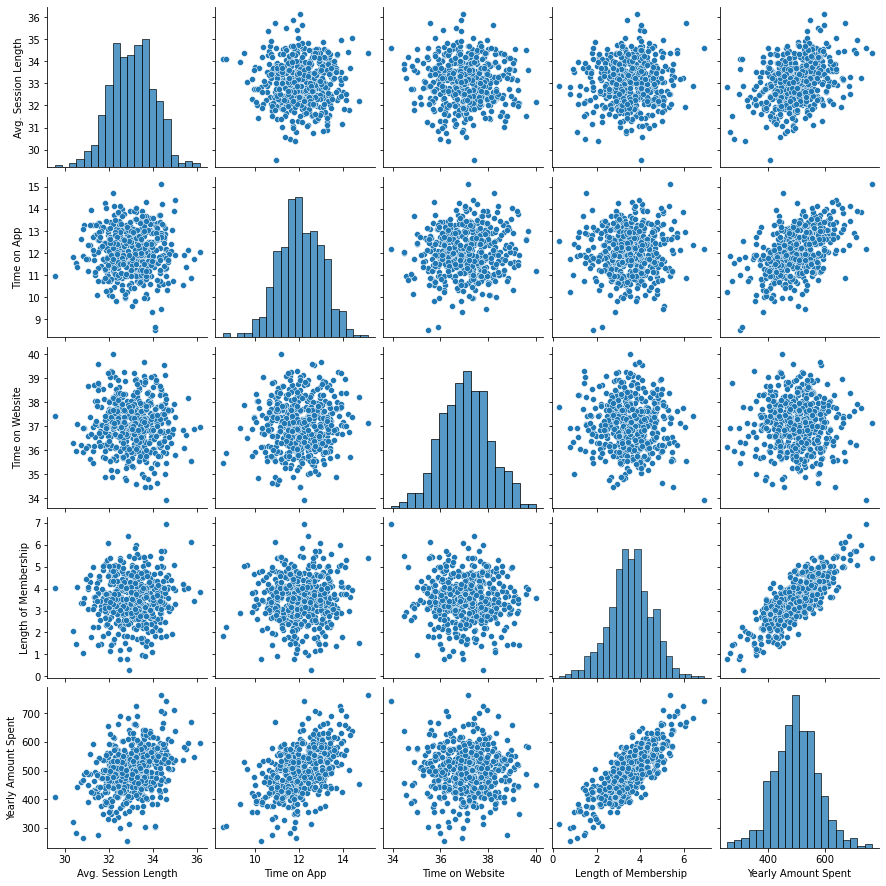

In [10]:
sns.pairplot(data)

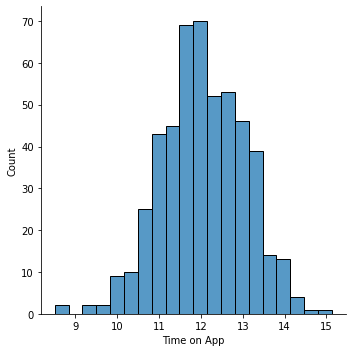

In [19]:
sns.displot(data['Time on App'])

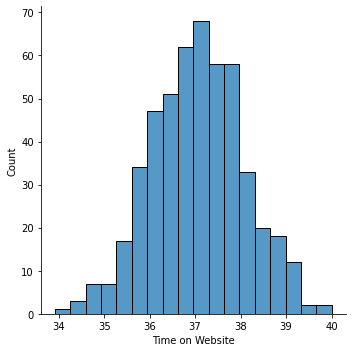

In [20]:
sns.displot(data['Time on Website'])

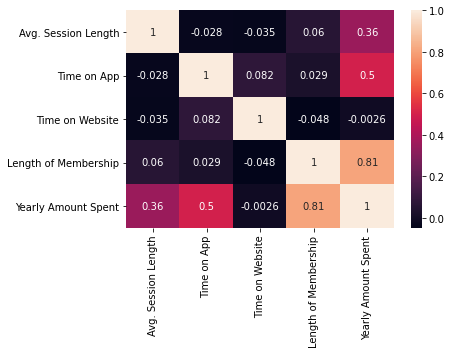

In [22]:
sns.heatmap(data.corr(),annot=True)

In [23]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [73]:
X=data[[  'Avg. Session Length', 'Time on Website',
        'Length of Membership', 'Yearly Amount Spent']]

In [74]:
y=data['Time on App']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [76]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()

In [77]:
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
print(lm.intercept_)

26.252241885541537


In [79]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,-0.631925
Time on Website,-0.005361
Length of Membership,-1.497842
Yearly Amount Spent,0.024384


In [64]:
predictions = lm.predict(X_test)

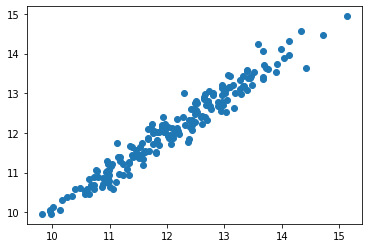

In [65]:
plt.scatter(y_test,predictions)

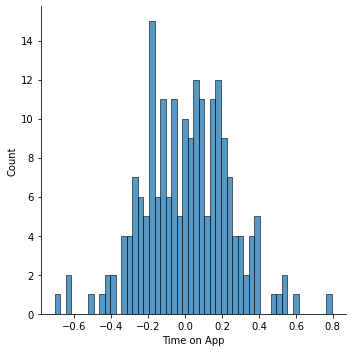

In [66]:
sns.displot((y_test-predictions),bins=50);

In [67]:
from sklearn import metrics

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.18853746379215508
MSE: 0.05503383405002987
RMSE: 0.23459291133798113


In [70]:
X=data[[  'Avg. Session Length', 'Time on App',
        'Length of Membership', 'Yearly Amount Spent']]
y=data['Time on Website']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm= LinearRegression()

lm.fit(X_train,y_train)

coeff_df1 = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df1


,Coefficient
Avg. Session Length,-0.106366
Time on App,-0.071735
Length of Membership,-0.384327
Yearly Amount Spent,0.004826


In [80]:
coeff_df

,Coefficient
Avg. Session Length,-0.631925
Time on Website,-0.005361
Length of Membership,-1.497842
Yearly Amount Spent,0.024384
